In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [8]:
df = pd.read_csv('train.csv')

In [9]:
pd.set_option('display.max_columns', None)

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [12]:
cat_var = [feature for feature in df.columns if df[feature].dtype == 'O']

In [13]:
cat_var

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [37]:
cat_var = cat_var[1:]

In [38]:
cat_var

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [14]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [15]:
df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [16]:
df['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [17]:
df['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [18]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [19]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [20]:
df['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [21]:
df['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [22]:
df['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [23]:
df['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [24]:
df['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [25]:
df['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [26]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [27]:
df['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [28]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [29]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

### Univariate Analysis

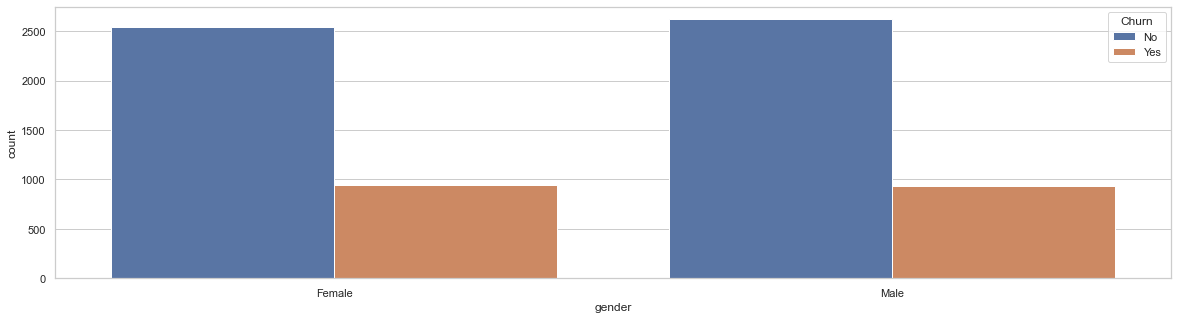

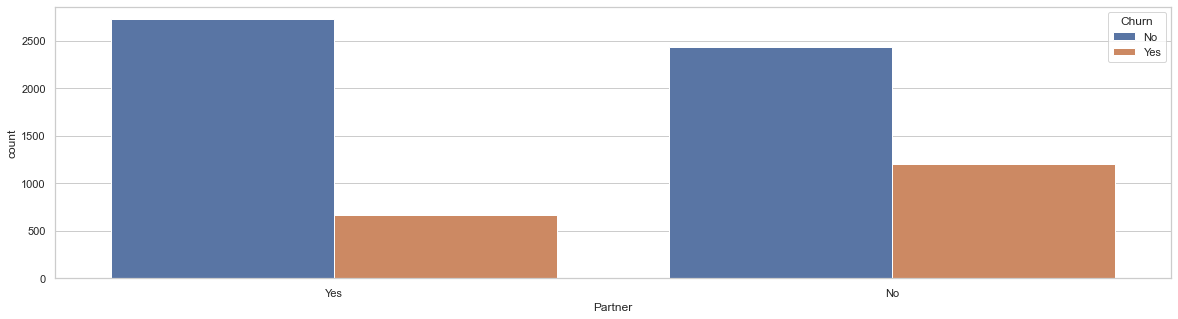

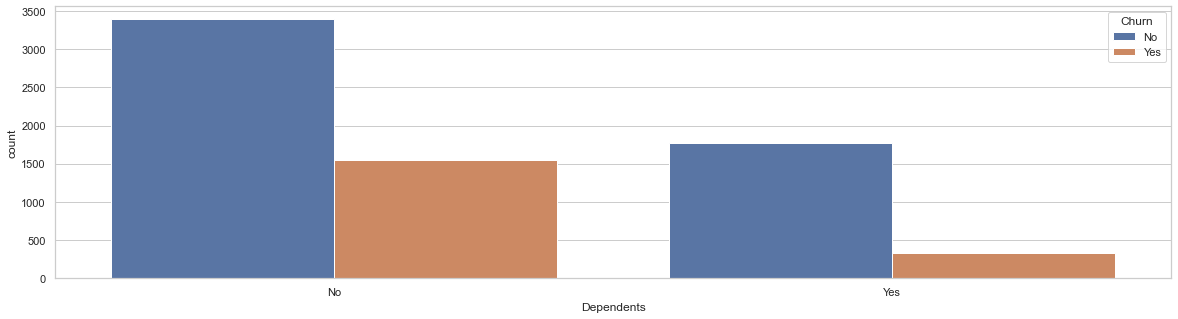

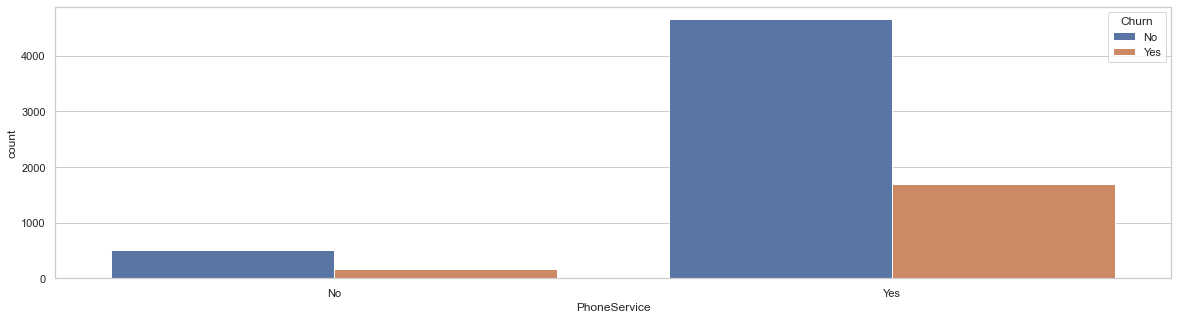

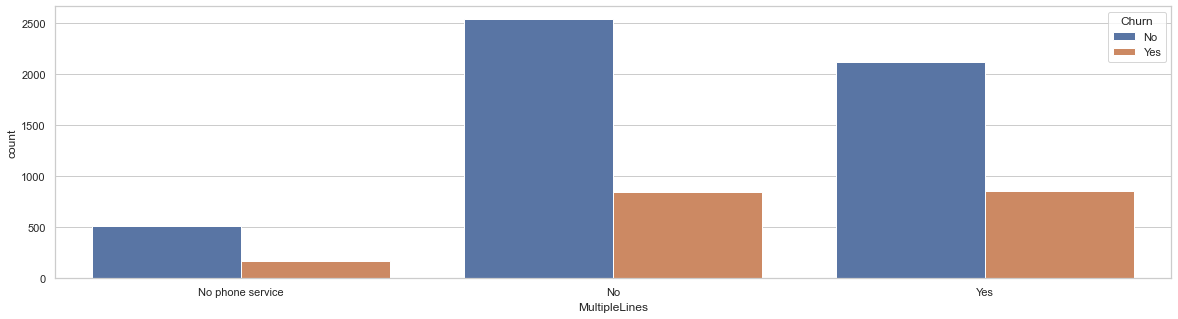

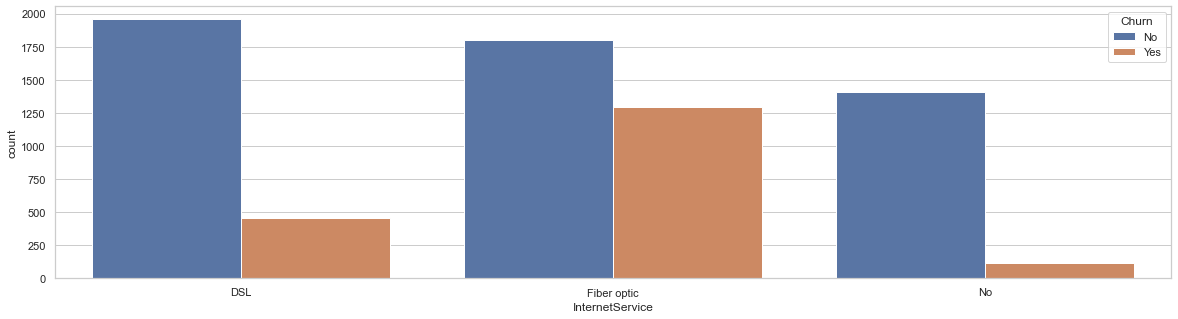

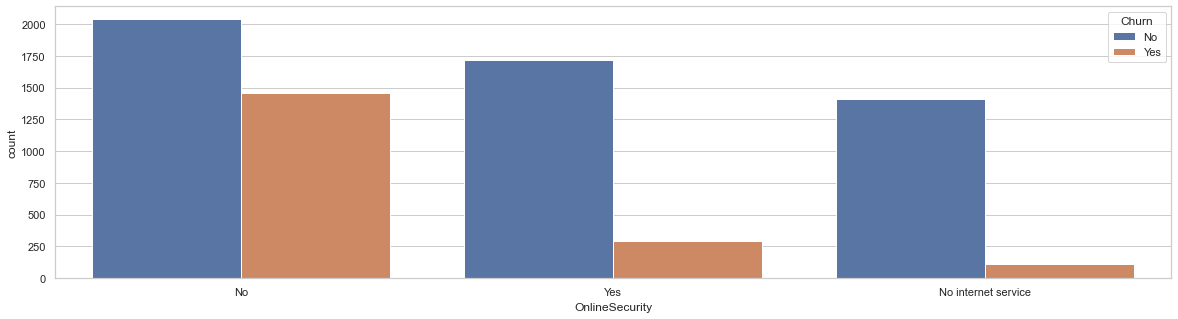

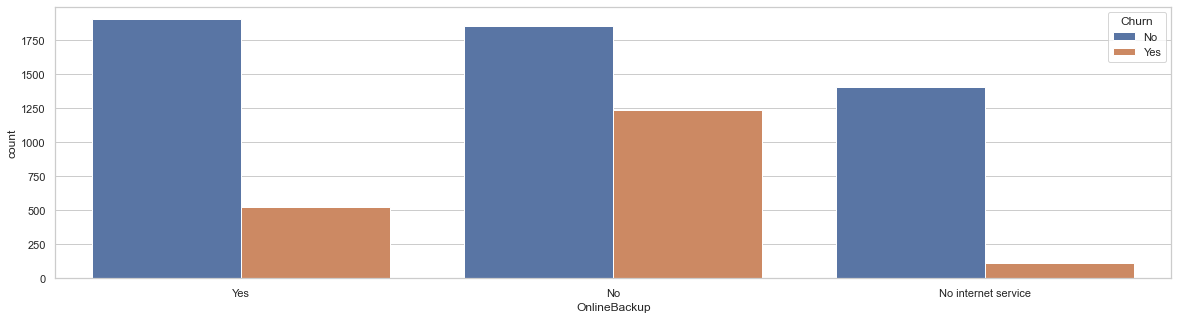

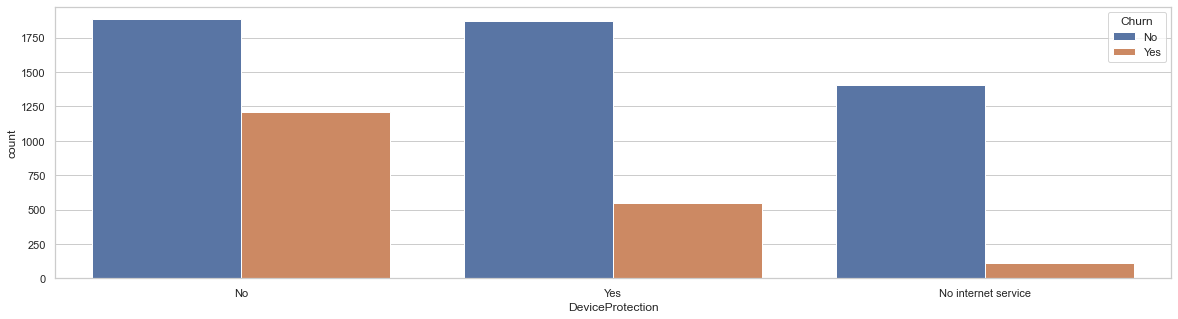

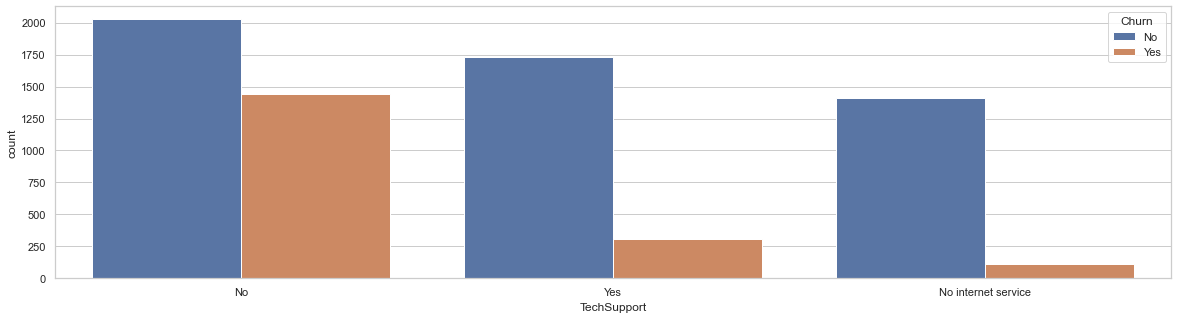

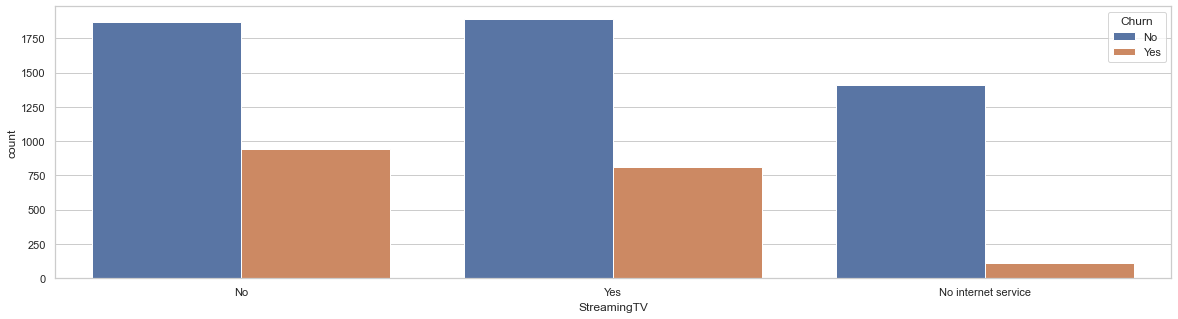

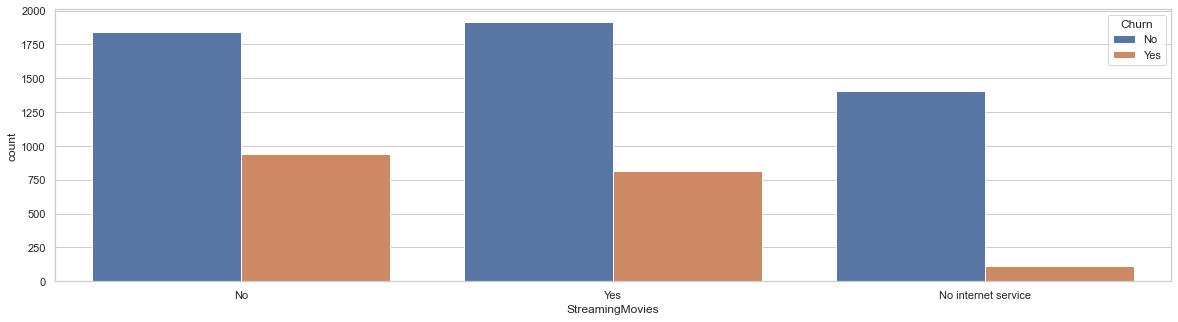

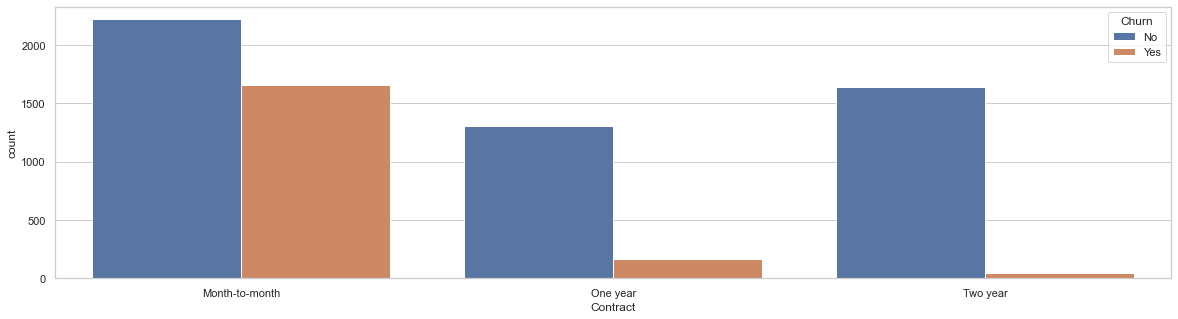

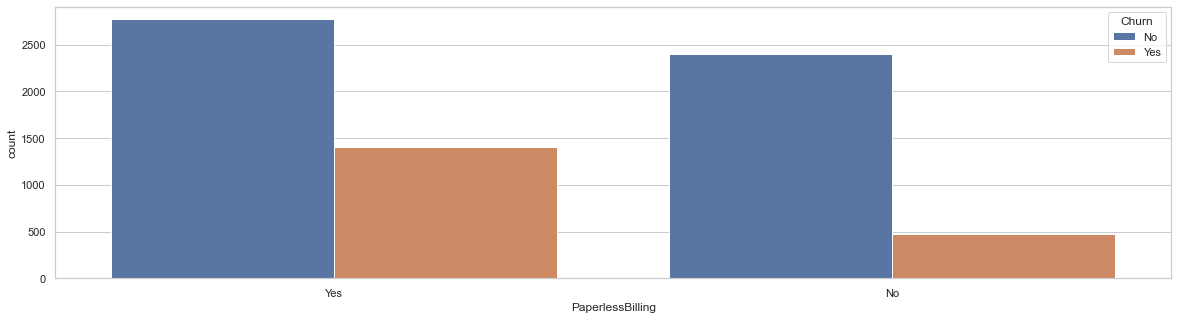

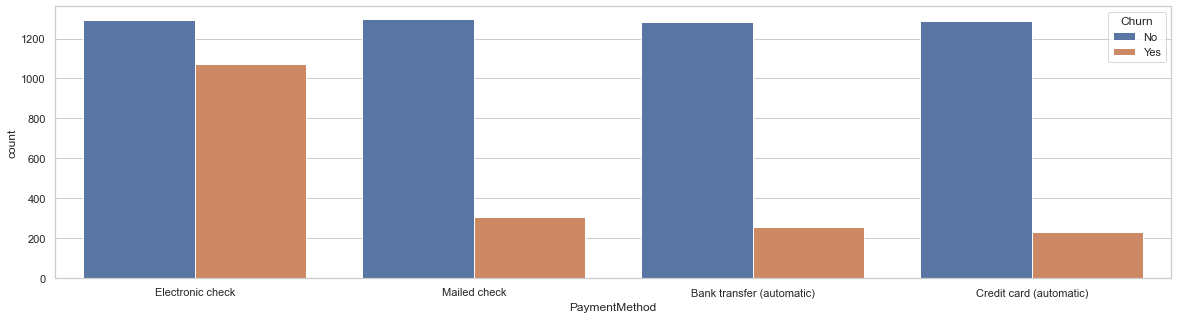

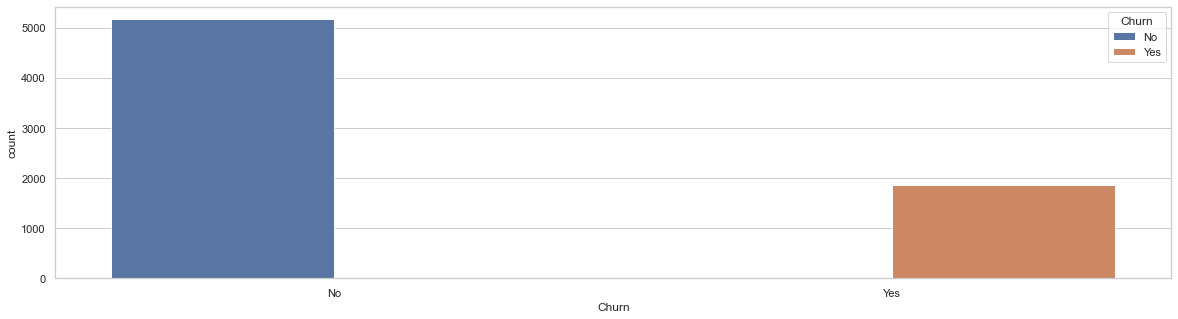

In [39]:
#display all categorical variables
for feature in cat_var:
    sns.set(style='whitegrid')
    plt.figure(figsize=(20,5))
    total = len(df)
    ax = sns.countplot(x = df[feature], hue = df['Churn'], data = df)
#     sns.countplot(x = df[feature], hue = df['Churn'], data = df)
    plt.show()

In [40]:
num_var = [feature for feature in df.columns if df[feature].dtype != 'O']

In [41]:
num_var

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


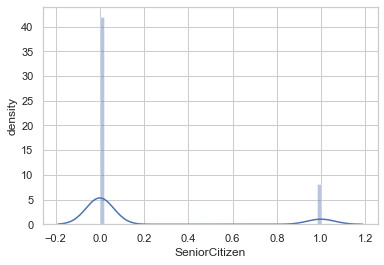

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


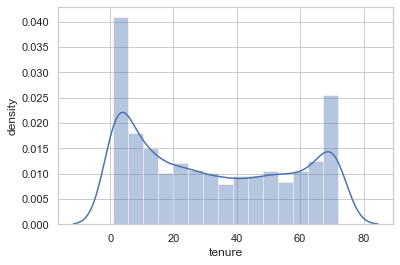

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


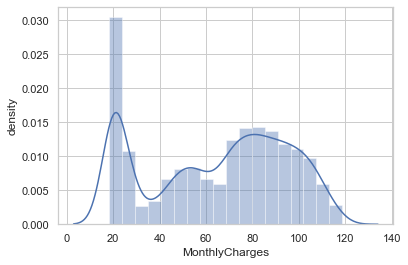

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


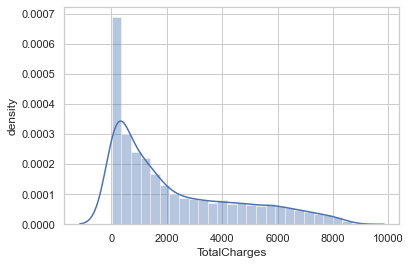

In [44]:
for feature in num_var:
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel('density')
    plt.show()

### BiVariate Analysis

<AxesSubplot:>

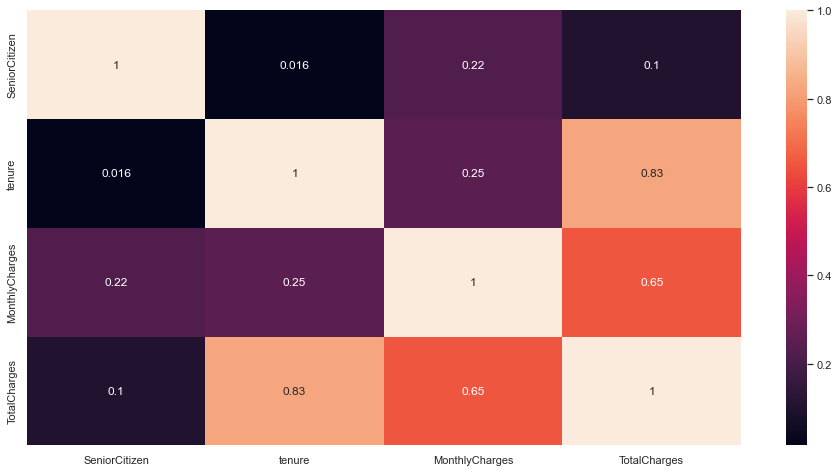

In [45]:
plt.figure(figsize=(16,8))
sns.heatmap(df[num_var].corr(), annot = True)

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Churn rate VS SeniorCitizen')

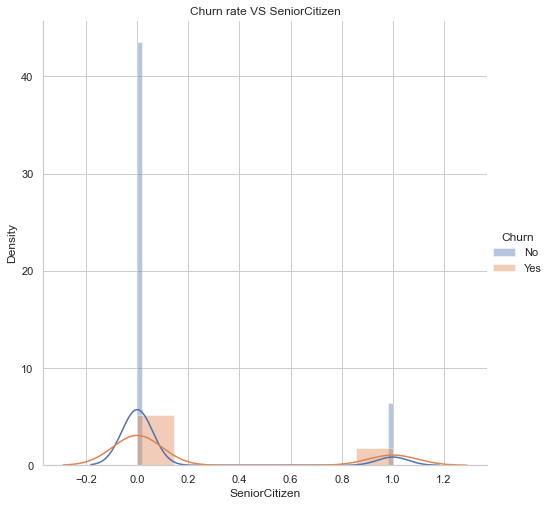

In [46]:
sns.FacetGrid(df, hue='Churn', size=7).map(sns.distplot, 'SeniorCitizen').add_legend()
plt.title('Churn rate VS SeniorCitizen')

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Churn rate VS tenure')

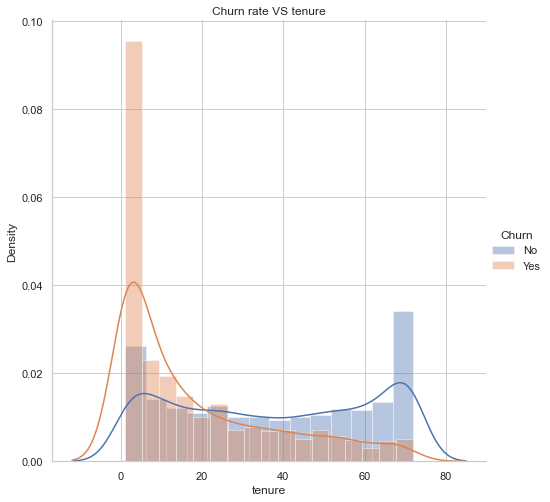

In [47]:
sns.FacetGrid(df, hue='Churn', size=7).map(sns.distplot, 'tenure').add_legend()
plt.title('Churn rate VS tenure')

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Churn rate VS MonthlyCharges')

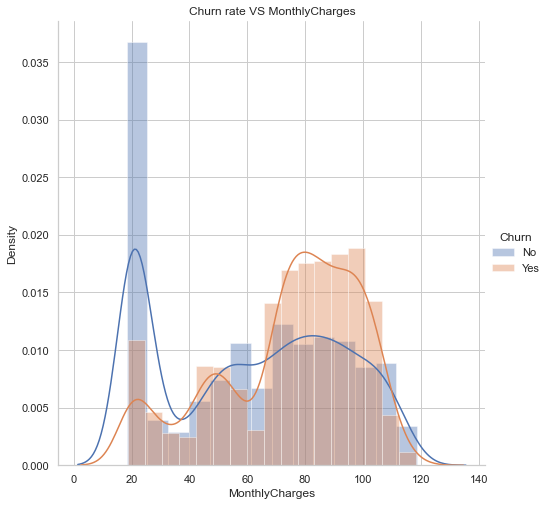

In [48]:
sns.FacetGrid(df, hue='Churn', size=7).map(sns.distplot, 'MonthlyCharges').add_legend()
plt.title('Churn rate VS MonthlyCharges')

In [54]:
df.head(10)

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,5575-GNVDE,0,34,56.95,1889.50,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3668-QPYBK,0,2,53.85,108.15,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,7795-CFOCW,0,45,42.30,1840.75,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,9237-HQITU,0,2,70.70,151.65,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
5,9305-CDSKC,0,8,99.65,820.50,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1
6,1452-KIOVK,0,22,89.10,1949.40,1,0,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
7,6713-OKOMC,0,10,29.75,301.90,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,7892-POOKP,0,28,104.80,3046.05,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1
9,6388-TABGU,0,62,56.15,3487.95,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [53]:
for i in cat_var:
    df = pd.get_dummies(df, drop_first = True, columns=[i])

KeyError: "None of [Index(['gender'], dtype='object')] are in the [columns]"

In [55]:
df.head(10)

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,5575-GNVDE,0,34,56.95,1889.50,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3668-QPYBK,0,2,53.85,108.15,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,7795-CFOCW,0,45,42.30,1840.75,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,9237-HQITU,0,2,70.70,151.65,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
5,9305-CDSKC,0,8,99.65,820.50,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1
6,1452-KIOVK,0,22,89.10,1949.40,1,0,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
7,6713-OKOMC,0,10,29.75,301.90,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,7892-POOKP,0,28,104.80,3046.05,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1
9,6388-TABGU,0,62,56.15,3487.95,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
df.info()

In [56]:
df['TotalCharges'].dtype

dtype('float64')

In [57]:
df['Churn'] = df['Churn_Yes'].rename('Churn')

In [58]:
df.drop(columns= ['Churn_Yes'], inplace = True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   SeniorCitizen                          7032 non-null   int64  
 2   tenure                                 7032 non-null   int64  
 3   MonthlyCharges                         7032 non-null   float64
 4   TotalCharges                           7032 non-null   float64
 5   gender_Male                            7032 non-null   uint8  
 6   Partner_Yes                            7032 non-null   uint8  
 7   Dependents_Yes                         7032 non-null   uint8  
 8   PhoneService_Yes                       7032 non-null   uint8  
 9   MultipleLines_No phone service         7032 non-null   uint8  
 10  MultipleLines_Yes                      7032 non-null   uint8  
 11  Inte

In [60]:
df['TotalCharges'] = df['TotalCharges'].astype(float, errors = 'raise')

In [61]:
X = df.drop(columns=['customerID', 'Churn'])
y = df['Churn']

In [62]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state = 14)
#stratified splitting improved accuracy by 1% bringing it closer to what SMOTE would have achieved without startified sampling

In [63]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [64]:
rfc_predict = rfc.predict(x_test)

In [65]:
rfc_accuracy = accuracy_score(y_test, rfc_predict)

In [66]:
rfc_accuracy

0.7940841865756542

In [67]:
rfc.score(x_train, y_train)

0.9979142965491088

In [69]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [70]:
rfc_search = GridSearchCV(estimator=rfc, 
                   param_grid=param_grid,
                   scoring='accuracy', 
                   verbose=1)

In [71]:
rfc_search.fit(x_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             scoring='accuracy', verbose=1)

In [72]:
rfc_search_predict = rfc_search.predict(x_test)

In [73]:
rfc_search_accuracy = accuracy_score(y_test, rfc_search_predict)
rfc_search_accuracy

0.8031854379977247

In [74]:
rfc_confusion_matrix = confusion_matrix(y_test, rfc_search_predict)

rfc_confusion_matrix

array([[1183,  108],
       [ 238,  229]], dtype=int64)

In [75]:
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}

In [77]:
xgbc = XGBClassifier(seed = 20)

In [78]:
xgbc_search = GridSearchCV(estimator=xgbc, 
                   param_grid=params,
                   scoring='accuracy', 
                   verbose=1)

In [79]:
xgbc_search.fit(x_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     n

In [80]:
xgbc_search_predict = xgbc_search.predict(x_test)

In [81]:
xgbc_search_accuracy = accuracy_score(y_test, xgbc_search_predict)
xgbc_search_accuracy

0.8043230944254836

In [83]:
xgbc_search_matrix = confusion_matrix(y_test, xgbc_search_predict)

xgbc_search_matrix

array([[1171,  120],
       [ 224,  243]], dtype=int64)

In [ ]:
xgbc_search.accuracy_score(x_train, x_test)

In [82]:
xgbc_search.score(x_train, y_train)

0.8200606750094804

In [ ]:
xgbc_search_accuracy = accuracy_score(y_train, xgbc_search_predict)
rfc.score(x_train, y_train)

In [ ]:
xgb = XGBClassifier(max_depth = 6, n_estimators = 300, learning_rate=0.01)
xgb.fit(x_train, y_train)

In [ ]:
xgb_predict = xgb.predict(x_test)

In [ ]:
xgb_accuracy = accuracy_score(y_test, xgb_predict)
xgb_accuracy

In [ ]:
xgb.score(x_train, y_train)

In [ ]:
xgb_confusion_matrix = confusion_matrix(y_test, xgb_predict)

xgb_confusion_matrix

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(learning_rate=0.01, n_estimators=300,max_depth=6)
gb.fit(x_train, y_train)
gb.score(x_train, y_train)

In [ ]:
predict_gb = gb.predict(x_test)

In [ ]:
gb_accuracy = accuracy_score(y_test, predict_gb)
gb_accuracy

In [ ]:
x_train.info()